   Plate  Reads  row  col  crow  ccol  dist  dist_chebychev  dist_c_row  \
0      1    161    1    0  -2.5  -5.5   8.0             5.5         2.5   
1      1    192    1    3  -2.5  -2.5   5.0             2.5         2.5   
2      1    108    1    9  -2.5   3.5   6.0             3.5         2.5   

   dist_c_col  border  inner_square  inner_rect   f_north   f_south    f_west  \
0         5.5    True         False       False  0.000936 -1.000000 -1.000000   
1         2.5   False         False       False  0.000878  0.000016  0.000036   
2         3.5   False         False       False -0.000023  0.000234 -0.000018   

     f_east  count_per_well  outlier  
0 -1.000000              11    False  
1 -1.000000              16    False  
2  0.000011              17    False  
Cross-Validation Scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean Score: 0.0000
Standard Deviation of Scores: 0.0000
Elapsed time for cross-validation: 9.557 seconds


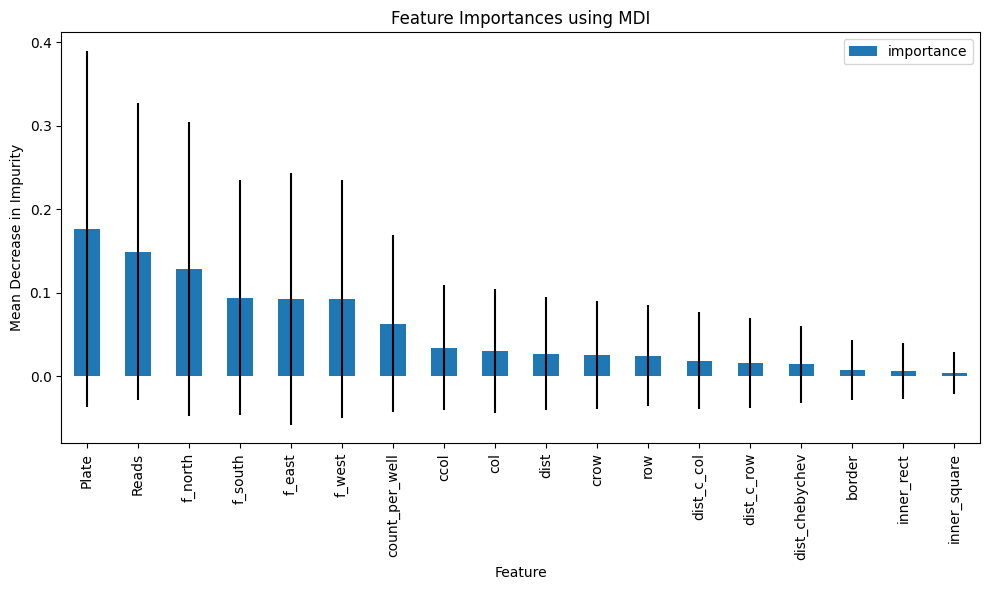

In [24]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.metrics import r2_score, make_scorer, accuracy_score, f1_score
import matplotlib.pyplot as plt
import time

# Load data
df = pd.read_csv("./data/ProtSpatial/outlier_df.csv", index_col=0)
X = df.drop(columns=["outlier"])
y = df["outlier"]

print(df.head(3))

# Define RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=1000,  # Number of trees
    max_depth=3,        # Maximum depth of trees
    random_state=42,    # For reproducibility
    n_jobs=-1           # Use all available cores
)

# Define Repeated K-Fold Cross-Validation
n_splits = 5   
n_repeats = 3
random_state = 42

rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)

# Define R^2 scorer
# scorer = make_scorer(accuracy_score)
scorer = make_scorer(f1_score)

# Perform cross-validation and calculate R^2 scores
start_time = time.time()
cv_scores = cross_val_score(rf_model, X, y, scoring=scorer, cv=rkf, n_jobs=-1)
elapsed_time = time.time() - start_time

# Output cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Score: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of Scores: {np.std(cv_scores):.4f}")
print(f"Elapsed time for cross-validation: {elapsed_time:.3f} seconds")

# Fit the model on the full dataset to compute feature importances
rf_model.fit(X, y)

# Compute feature importances
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

# Map importances to feature names
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)
forest_importances_df = pd.DataFrame(forest_importances, columns=["importance"])
forest_importances_df["std"] = std

# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 6))
forest_importances_df.sort_values("importance", ascending=False).head(20).plot.bar(
    y="importance", yerr="std", ax=ax
)
ax.set_title("Feature Importances using MDI")
ax.set_ylabel("Mean Decrease in Impurity")
ax.set_xlabel("Feature")
fig.tight_layout()

plt.show()


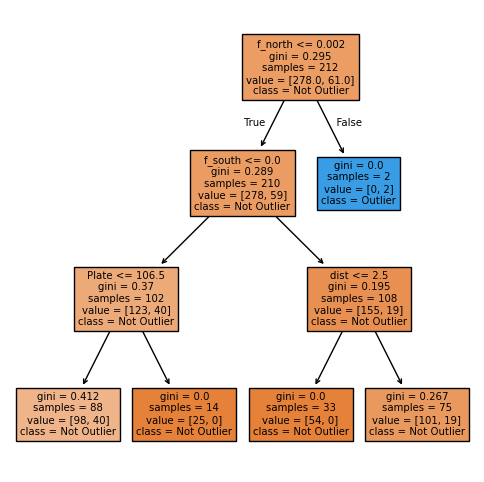

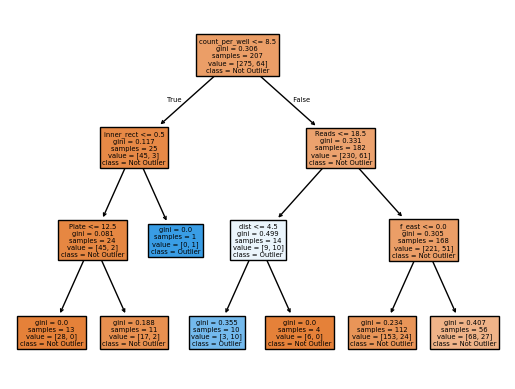

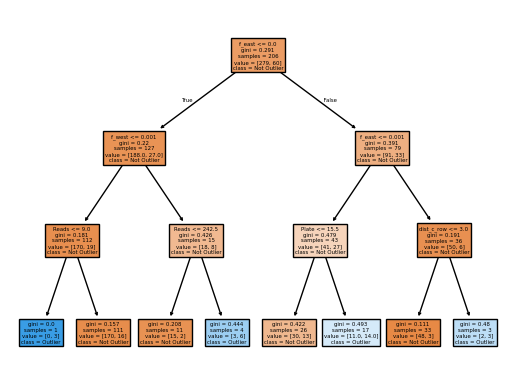

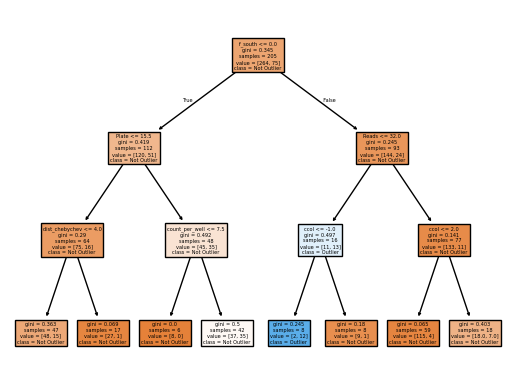

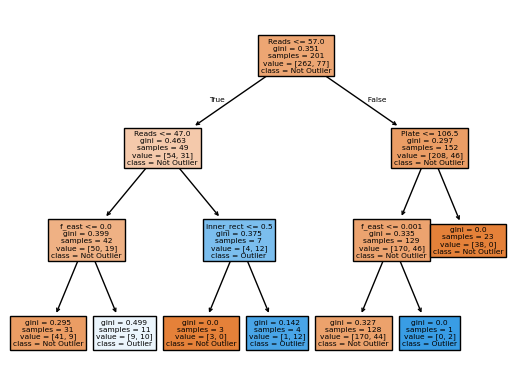

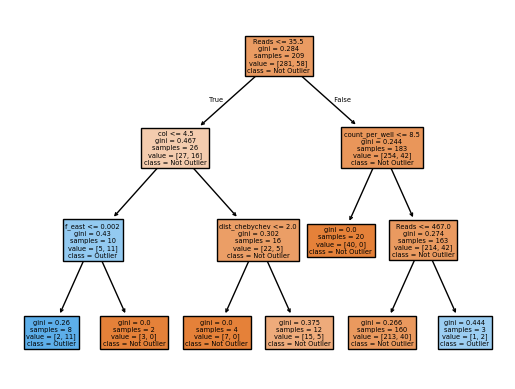

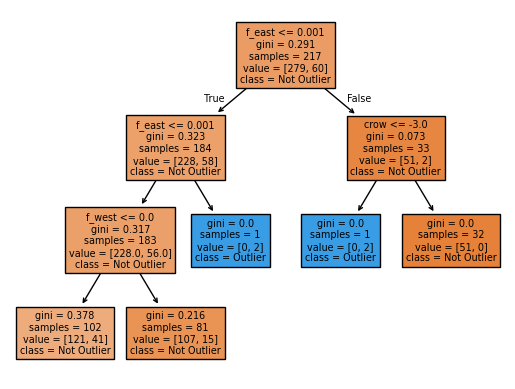

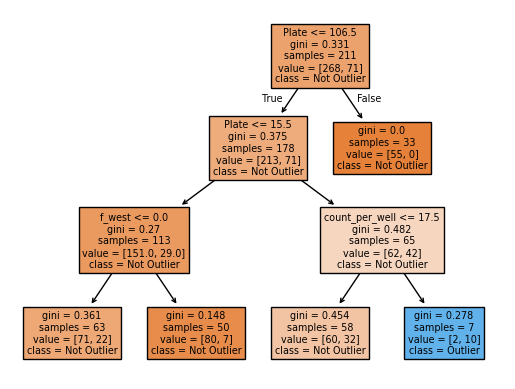

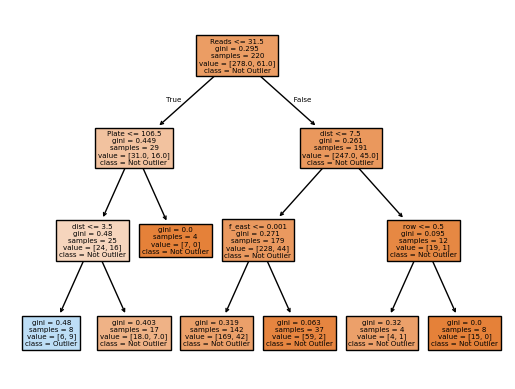

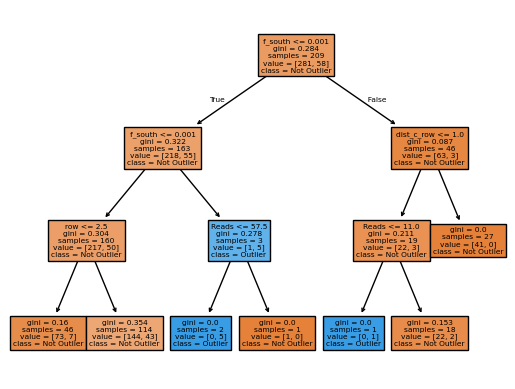

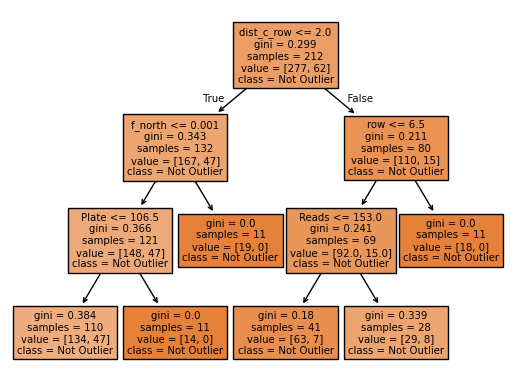

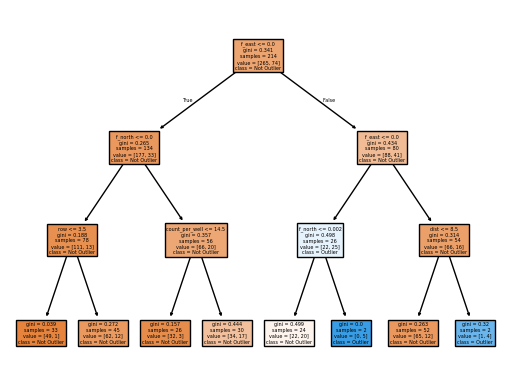

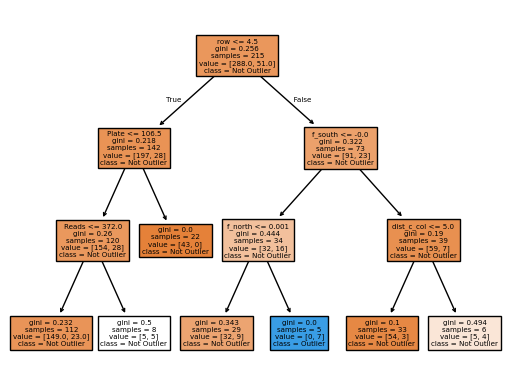

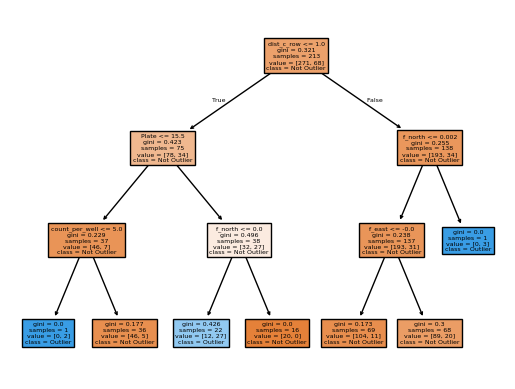

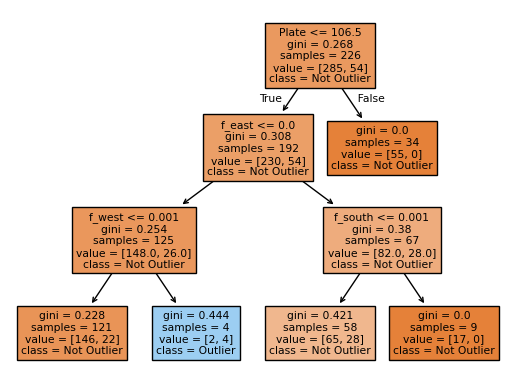

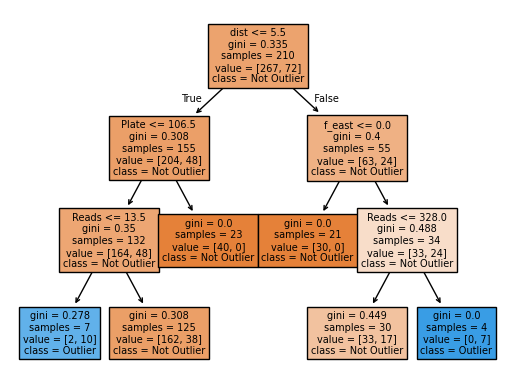

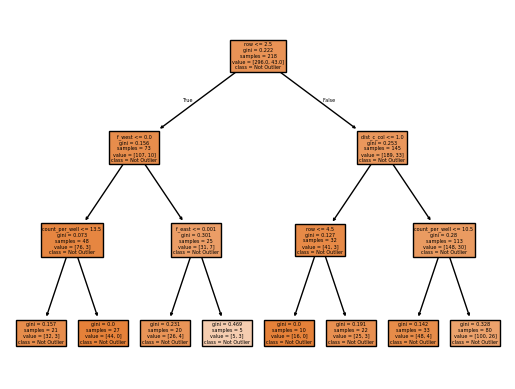

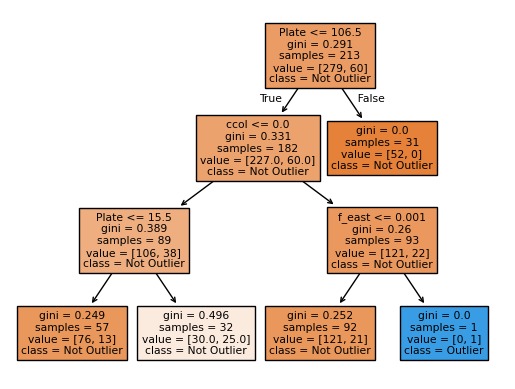

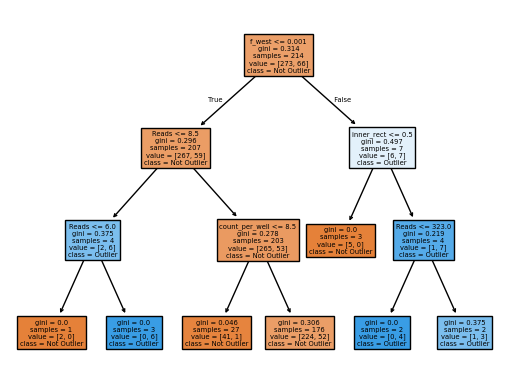

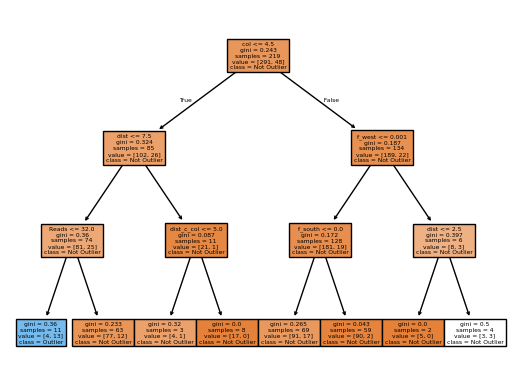

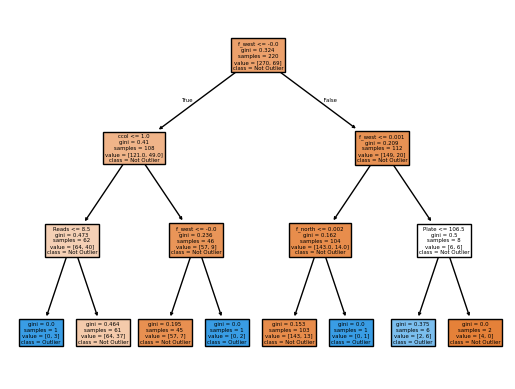

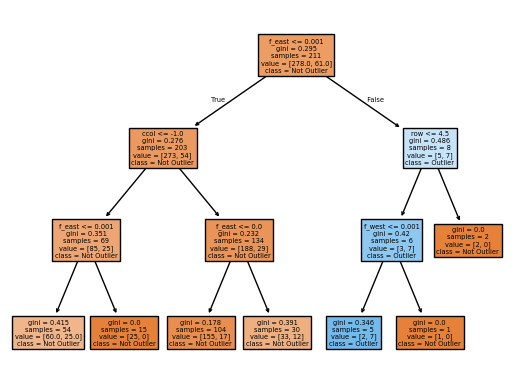

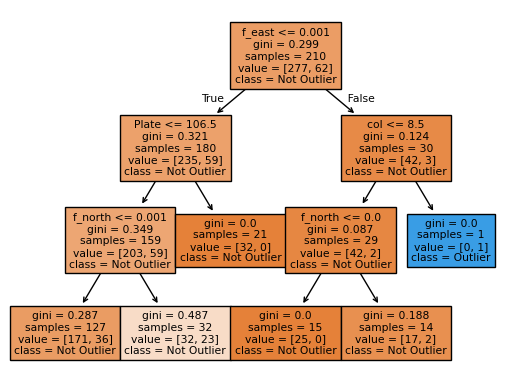

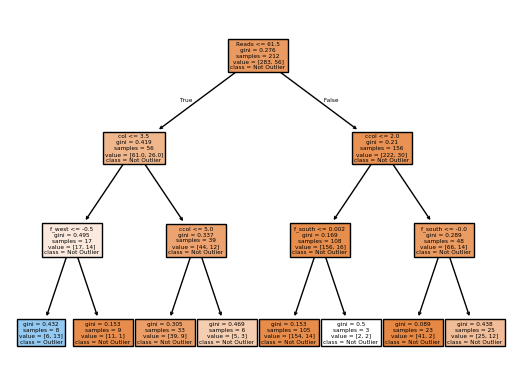

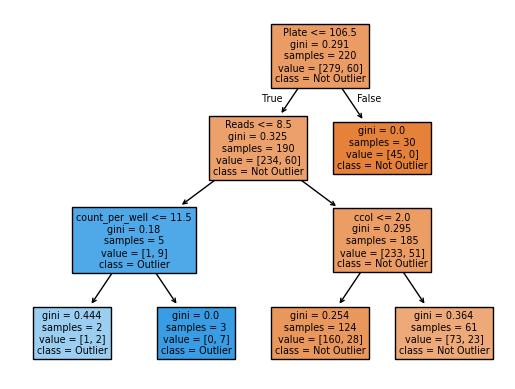

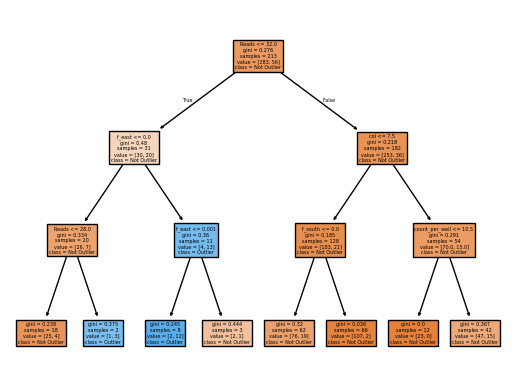

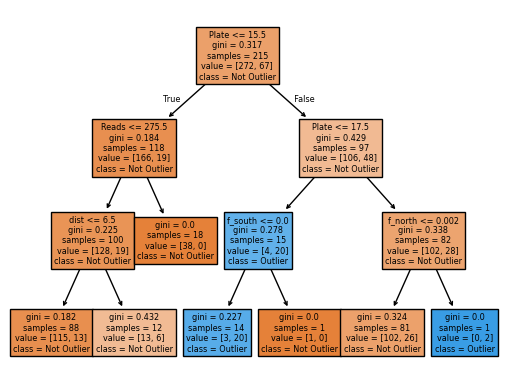

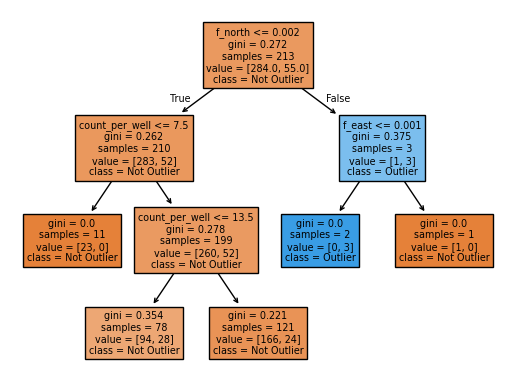

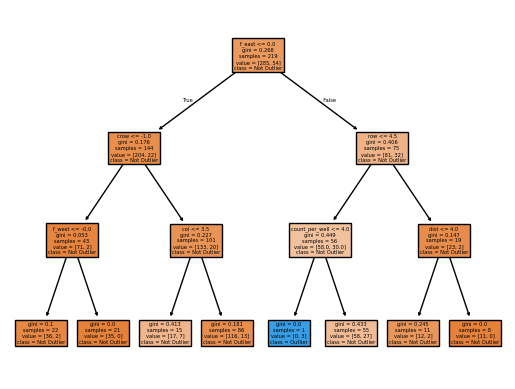

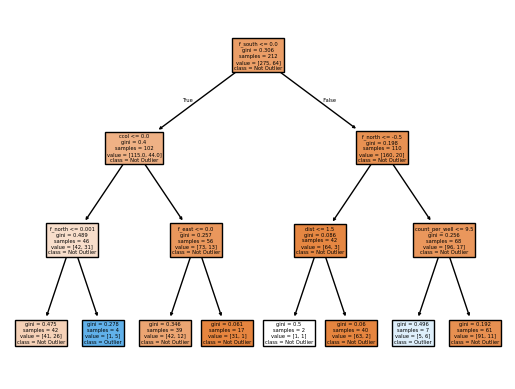

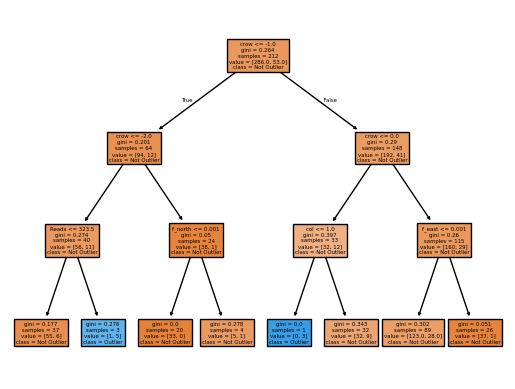

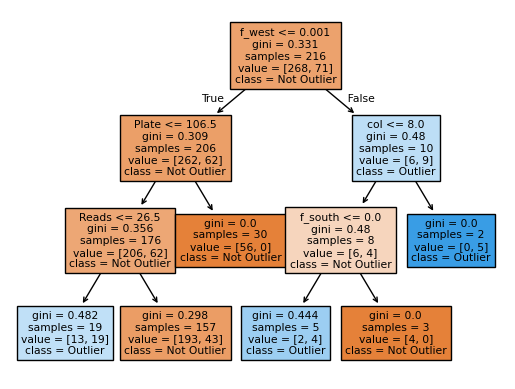

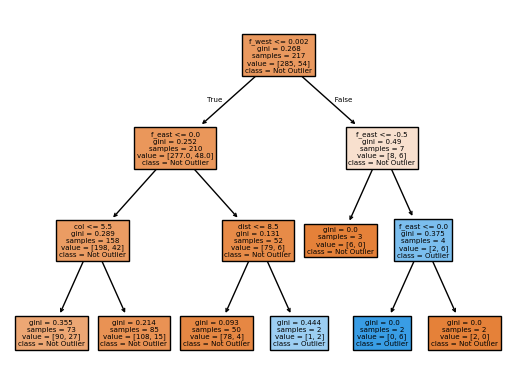

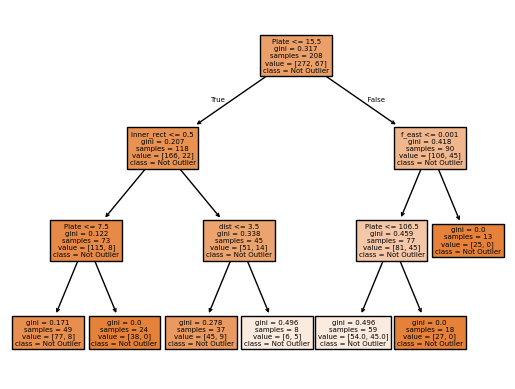

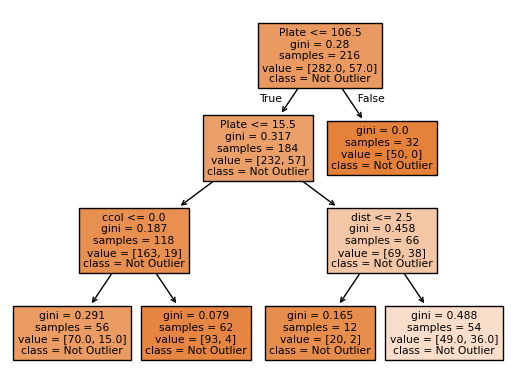

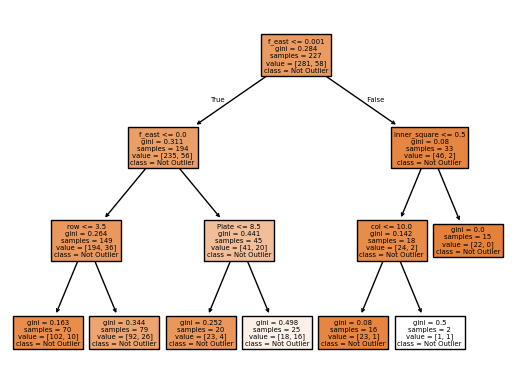

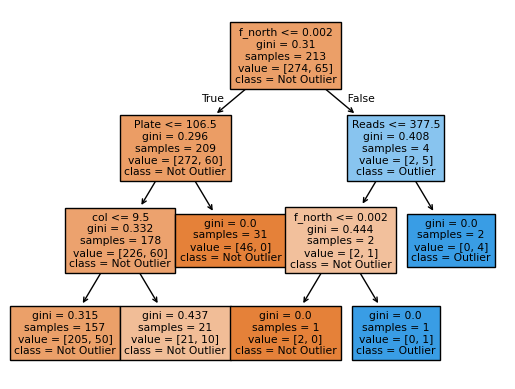

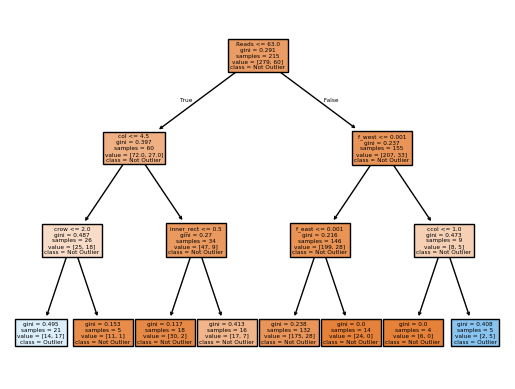

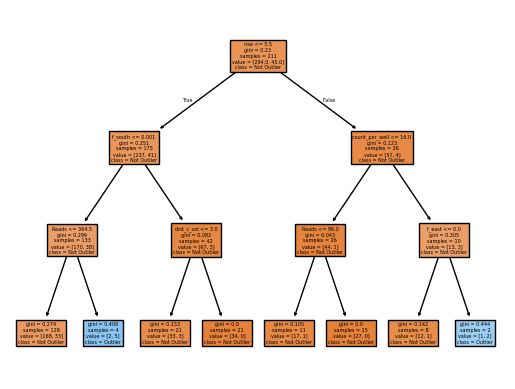

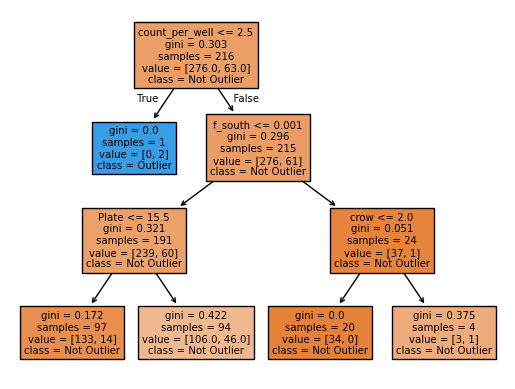

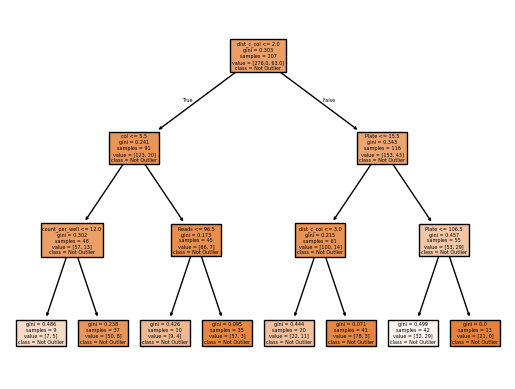

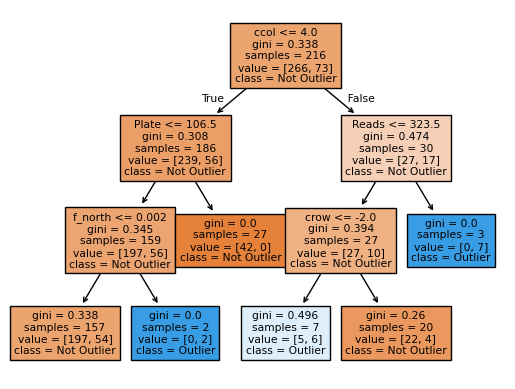

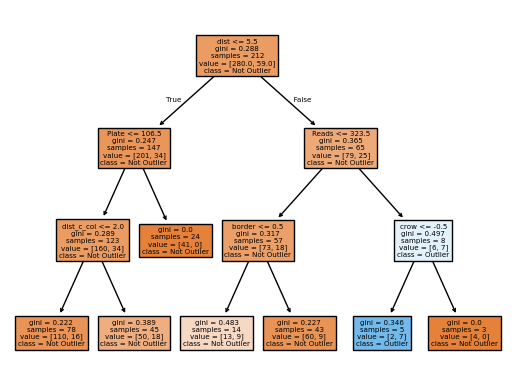

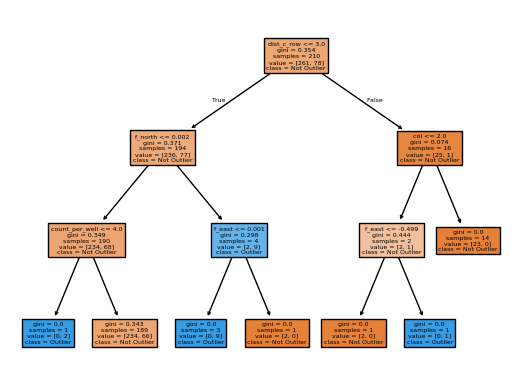

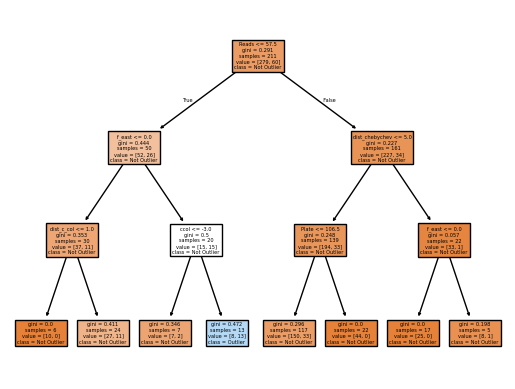

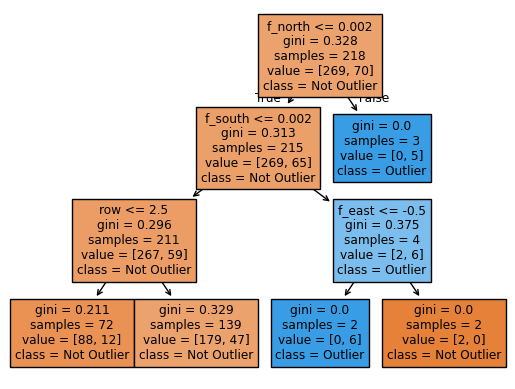

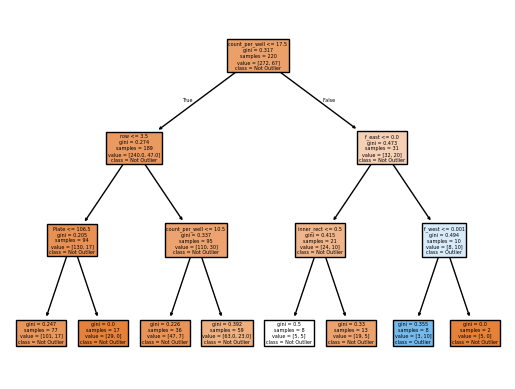

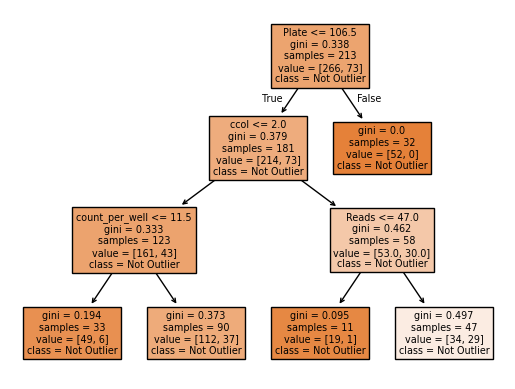

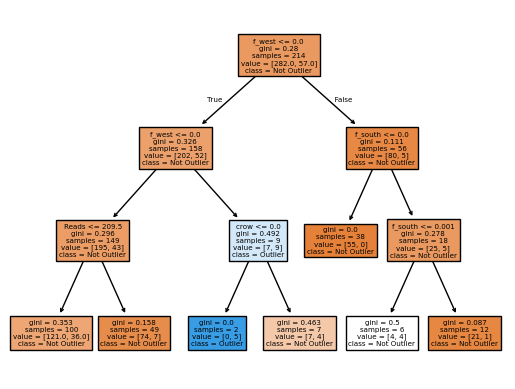

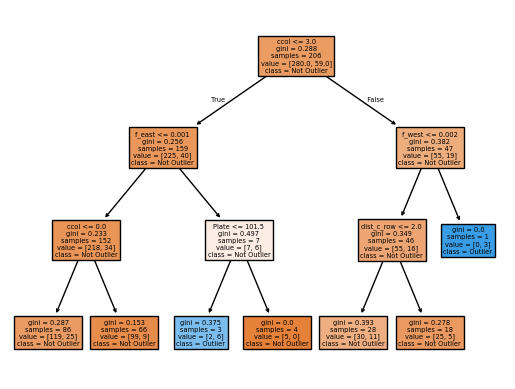

In [25]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))

for i in range(50):
    estimator = rf_model.estimators_[i]

    tree.plot_tree(
        estimator,
        feature_names=feature_names,
        class_names=["Not Outlier", "Outlier"],
        filled=True,
        ax=plt.gca(),  # Use the same axes for all trees
    )

    plt.show()

